In [16]:
import os
import warnings

# Suppress the TensorFlow  for logs and Python warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Dropout

In [18]:
# Load datasets
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
train_data.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [19]:
# Data Preprocessing
# Use the Open column as the primary feature for simplicity
train_set = train_data['Open'].values.reshape(-1, 1)
test_set = test_data['Open'].values.reshape(-1, 1)


In [5]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = scaler.fit_transform(train_set)


In [20]:
# Create training data structure
N = 30  
X_train = []
y_train = []

for i in range(N, len(scaled_training_set)):
    X_train.append(scaled_training_set[i-N:i, 0])
    y_train.append(scaled_training_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [21]:
# Reshaping the data to 3D for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [22]:
# Prepare test data
real_stock_price = test_data.iloc[:, 1:2].values
total_data = pd.concat((train_data['Open'], test_data['Open']), axis=0)

inputs = total_data[len(total_data) - len(test_data) - N:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(N, len(inputs)):
    X_test.append(inputs[i-N:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [23]:
# Define a function to build and train the model 
def build_and_train_model(rnn_type, optimizer, epochs, batch_size):
    model = Sequential()
    if rnn_type == "Vanilla RNN":
        model.add(SimpleRNN(
            units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))
        model.add(SimpleRNN(units=50, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(SimpleRNN(units=50))
    elif rnn_type == "GRU":
        model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))
        model.add(GRU(units=50, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(GRU(units=50))
    elif rnn_type == "LSTM":
        model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))
        model.add(LSTM(units=50, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=50))
    else:
        raise ValueError("Invalid RNN type")
    
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model


Training Vanilla RNN with optimizer: Adam
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.3398
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1191
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0660
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0500
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0403
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0323
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0288
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0203
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0206
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0137
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0133
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0137
Epoch 15/20
39/39 ━━━━━━━━━━

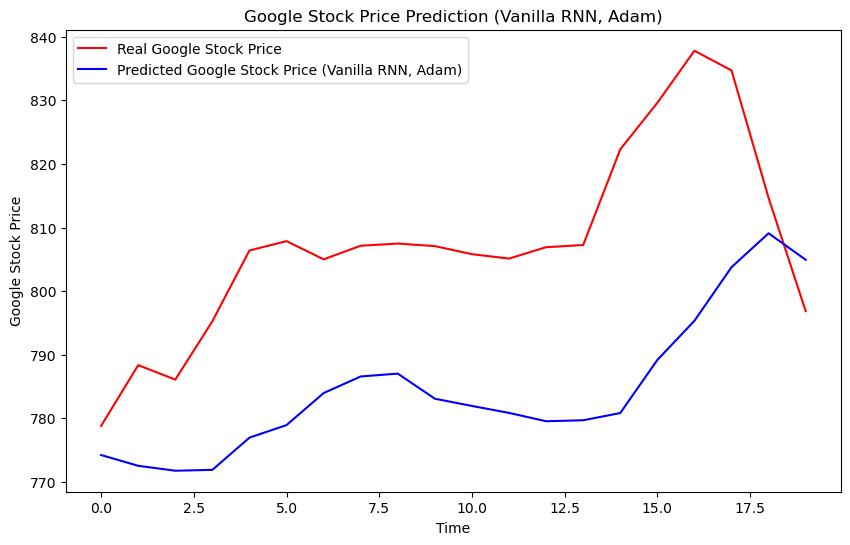


Training Vanilla RNN with optimizer: SGD
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.4385
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2073
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1059
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0929
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0761
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0723
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0520
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0541
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0417
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0343
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0333
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0321
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0309
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0274
Epoch 15/20
39/39 ━━━━━━━━━━━

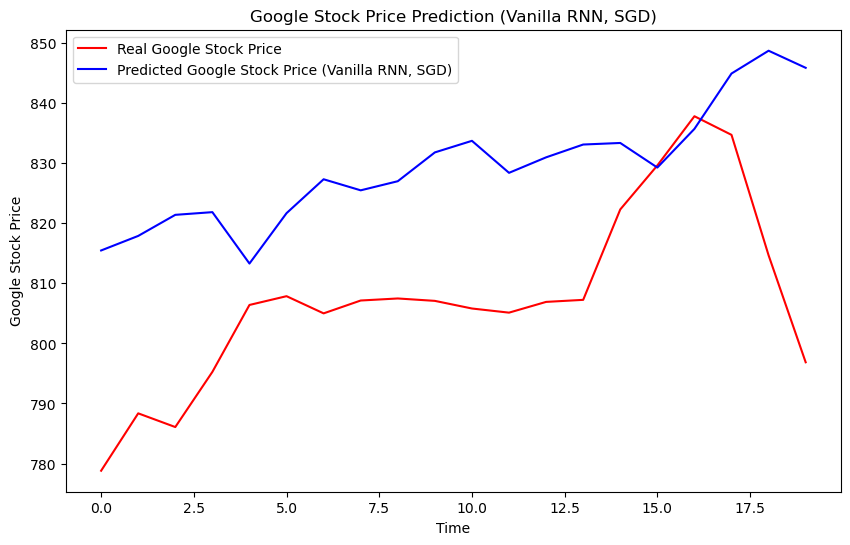


Training Vanilla RNN with optimizer: RMSprop
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.4091
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1446
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0970
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0542
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0340
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0267
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0168
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0129
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0100
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0107
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0081
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0074
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0075
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0087
Epoch 15/20
39/39 ━━━━━━━

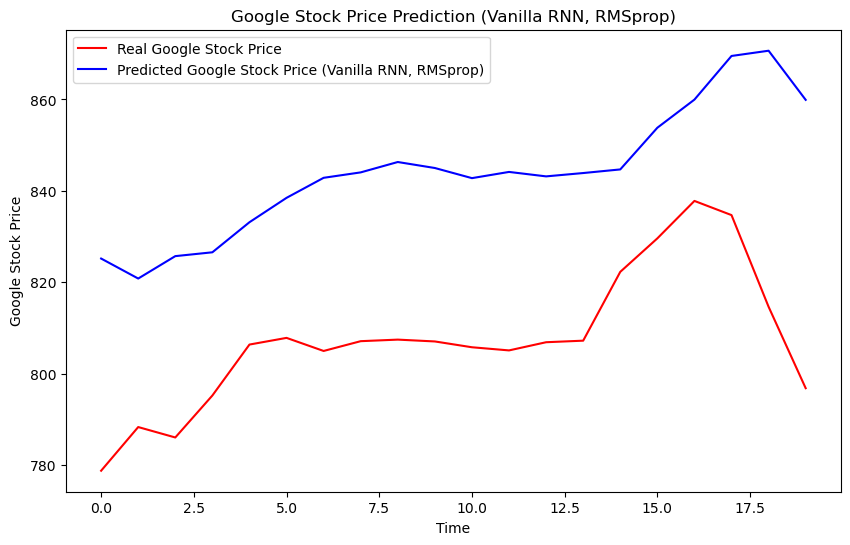


Training GRU with optimizer: Adam
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1186
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0074
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0058
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0040
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0045
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0035
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0036
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0033
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0036
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0031
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0035
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0032
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0030
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0028
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━

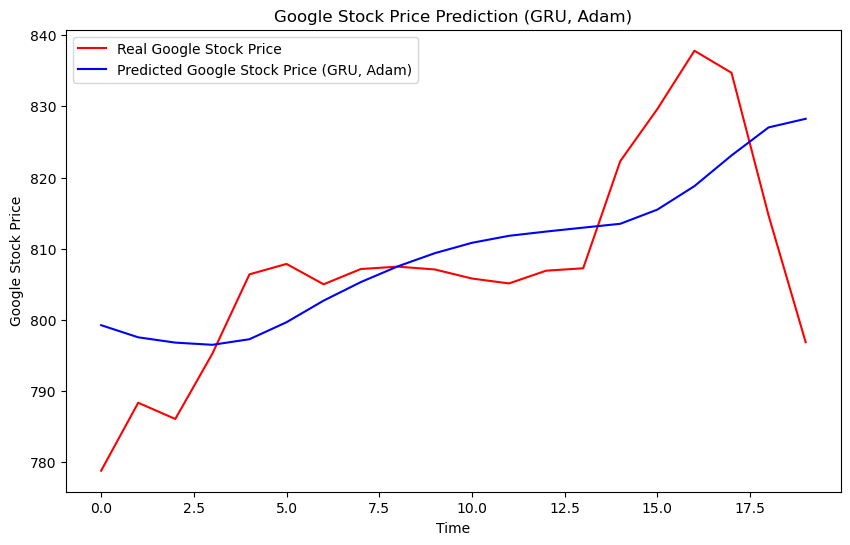


Training GRU with optimizer: SGD
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1338
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0476
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0362
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0289
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0197
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0129
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0089
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0073
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0059
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0059
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0050
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0046
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0050
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0045
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━

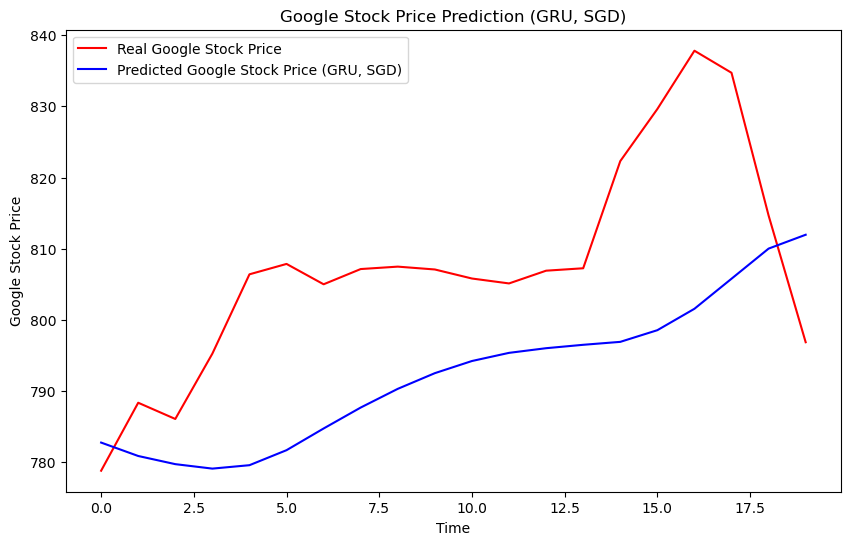


Training GRU with optimizer: RMSprop
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0646
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0080
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0088
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0073
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0050
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0055
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0062
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0060
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0050
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0041
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0051
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0050
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0040
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0042
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━

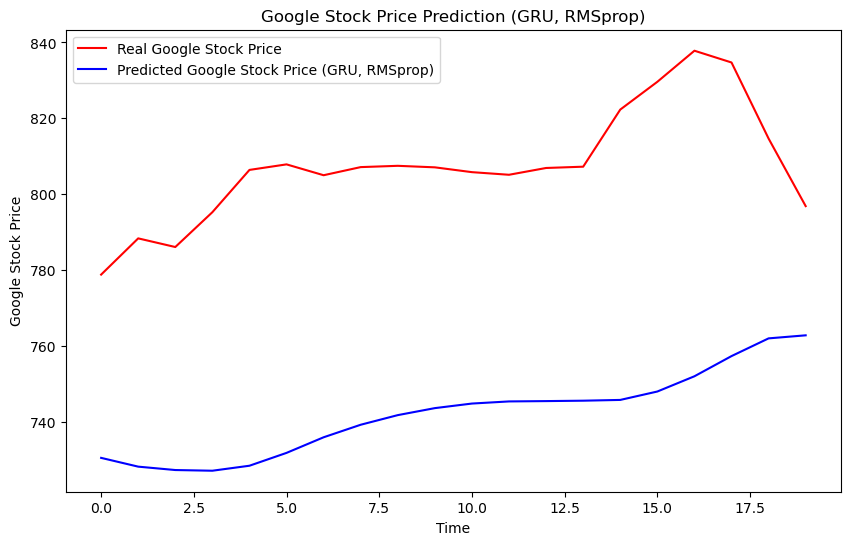


Training LSTM with optimizer: Adam
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1111
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0061
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0050
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0049
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0043
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0038
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0041
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0042
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0036
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0034
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0037
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0035
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0032
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0037
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━

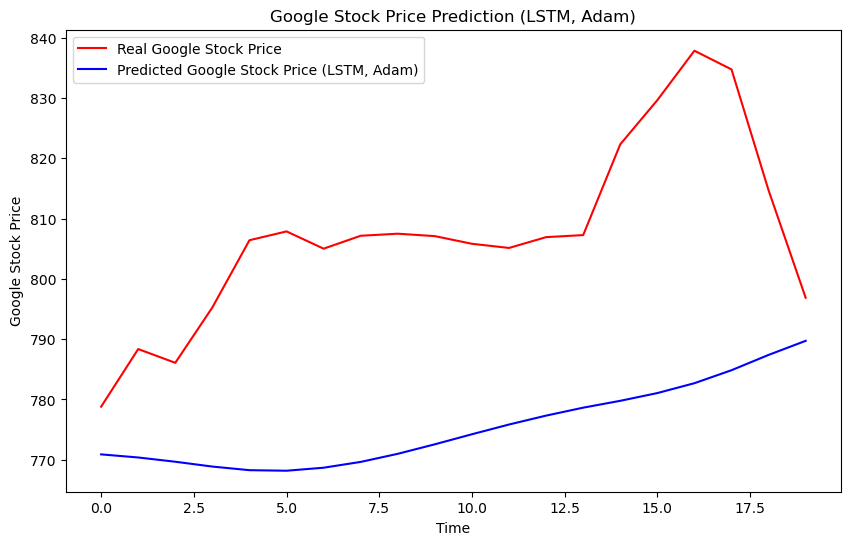


Training LSTM with optimizer: SGD
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1557
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0598
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0430
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0256
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0165
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0064
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0053
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0059
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0044
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0048
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0052
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━

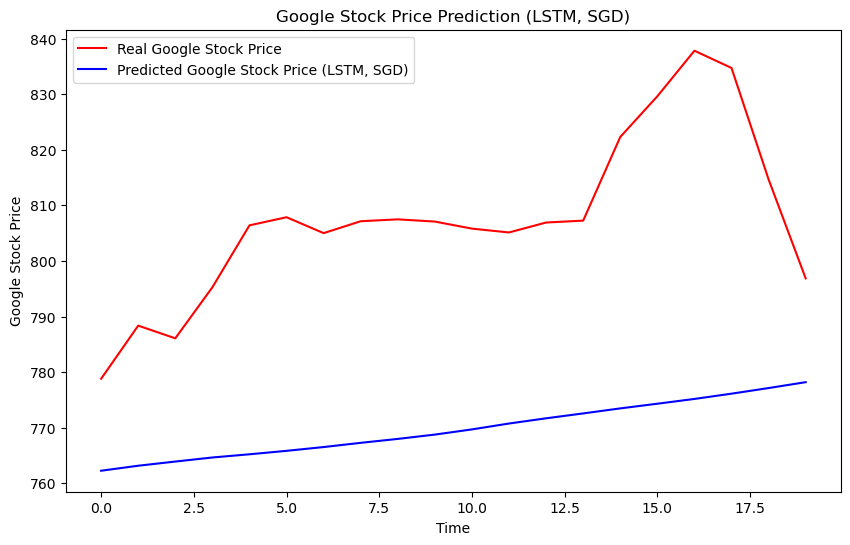


Training LSTM with optimizer: RMSprop
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0496
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0108
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0099
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0068
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0072
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0075
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0050
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0058
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0053
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0056
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0056
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0063
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0050
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0041
Epoch 15/20
39/39 ━━━━━━━━━━━━━━

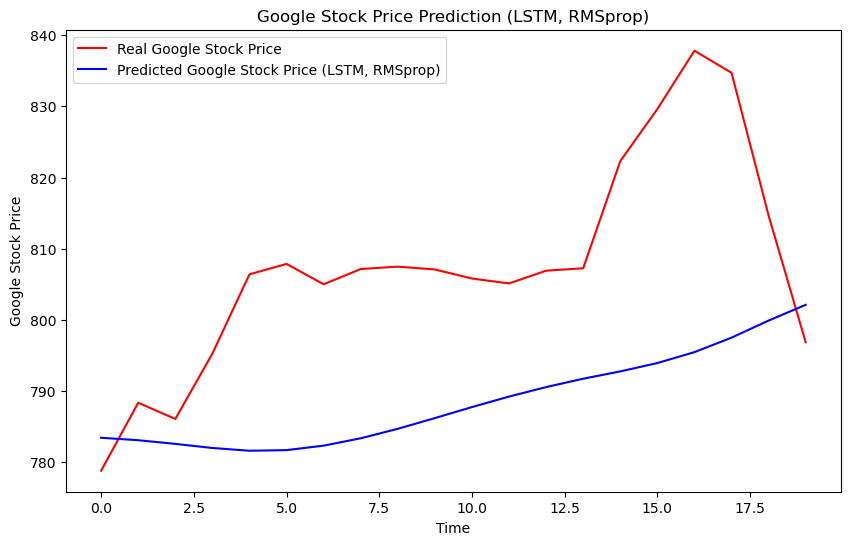


Performance Summary:
Model: Vanilla RNN | Optimizer: Adam
  Mean Squared Error (MSE): 673.41
  Mean Absolute Error (MAE): 23.73
Model: Vanilla RNN | Optimizer: SGD
  Mean Squared Error (MSE): 629.77
  Mean Absolute Error (MAE): 22.08
Model: Vanilla RNN | Optimizer: RMSprop
  Mean Squared Error (MSE): 1430.44
  Mean Absolute Error (MAE): 36.52
Model: GRU | Optimizer: Adam
  Mean Squared Error (MSE): 141.40
  Mean Absolute Error (MAE): 9.28
Model: GRU | Optimizer: SGD
  Mean Squared Error (MSE): 377.30
  Mean Absolute Error (MAE): 17.14
Model: GRU | Optimizer: RMSprop
  Mean Squared Error (MSE): 4414.01
  Mean Absolute Error (MAE): 65.36
Model: LSTM | Optimizer: Adam
  Mean Squared Error (MSE): 1182.52
  Mean Absolute Error (MAE): 32.03
Model: LSTM | Optimizer: SGD
  Mean Squared Error (MSE): 1568.85
  Mean Absolute Error (MAE): 37.79
Model: LSTM | Optimizer: RMSprop
  Mean Squared Error (MSE): 511.24
  Mean Absolute Error (MAE): 19.91


In [26]:

# Hyperparameters
epochs = 20
batch_size = 32

# RNN types and optimizers to test
rnn_types = ["Vanilla RNN", "GRU", "LSTM"]
optimizers = [
    ("Adam", Adam),
    ("SGD", SGD),
    ("RMSprop", RMSprop)
]
results = {}


# Train models for each combination of RNN type and optimizer
for rnn_type in rnn_types:
    for optimizer_name, optimizer_class in optimizers:  
        print(f"\nTraining {rnn_type} with optimizer: {optimizer_name}")
        
        # Create a fresh optimizer instance for each training run
        optimizer = optimizer_class()  
        
        # Build and train the model
        model = build_and_train_model(rnn_type, optimizer, epochs, batch_size)
        
        # Test the model
        predicted_stock_price = model.predict(X_test)
        predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
        
        # Evaluate performance
        mse = mean_squared_error(real_stock_price, predicted_stock_price)
        mae = mean_absolute_error(real_stock_price, predicted_stock_price)
        
        # storing the results
        results[(rnn_type, optimizer_name)] = {
            'model': model,
            'mse': mse,
            'mae': mae,
            'predicted_stock_price': predicted_stock_price
        }

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
        plt.plot(predicted_stock_price, color='blue', label=f'Predicted Google Stock Price ({rnn_type}, {optimizer_name})')
        plt.title(f'Google Stock Price Prediction ({rnn_type}, {optimizer_name})')
        plt.xlabel('Time')
        plt.ylabel('Google Stock Price')
        plt.legend()
        plt.show()

# Displaying the  performance summary
print("\nPerformance Summary:")
for (rnn_type, optimizer_name), result in results.items():
    print(f"Model: {rnn_type} | Optimizer: {optimizer_name}")
    print(f"  Mean Squared Error (MSE): {result['mse']:.2f}")
    print(f"  Mean Absolute Error (MAE): {result['mae']:.2f}")

In [34]:
# Function to build and train the model for hyperparameterization
def build_and_train_model(rnn_type, optimizer, units, epochs, batch_size):
    model = Sequential()
    
    # Add RNN layer based on the type specified
    if rnn_type == "Vanilla RNN":
        model.add(SimpleRNN(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    elif rnn_type == "GRU":
        model.add(GRU(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    elif rnn_type == "LSTM":
        model.add(LSTM(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    
    model.add(Dense(units=1)) 
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model


Training Vanilla RNN | Optimizer: Adam | Units: 50 | Epochs: 10 | Batch Size: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Training Vanilla RNN | Optimizer: Adam | Units: 50 | Epochs: 10 | Batch Size: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Training Vanilla RNN | Optimizer: Adam | Units: 50 | Epochs: 20 | Batch Size: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

Training Vanilla RNN | Optimizer: Adam | Units: 50 | Epochs: 20 | Batch Size: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

Training Vanilla RNN | Optimizer: Adam | Units: 100 | Epochs: 10 | Batch Size: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Training Vanilla RNN | Optimizer: Adam | Units: 100 | Epochs: 10 | Batch Size: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

Training Vanilla RNN | Optimizer: Adam | Units: 100 | Epochs: 20 | Batch Size: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Training Vanilla RNN | Optimizer: Adam | Units: 100 | Epochs: 20 | Batch Size: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Training Vanilla RNN | Optimizer:

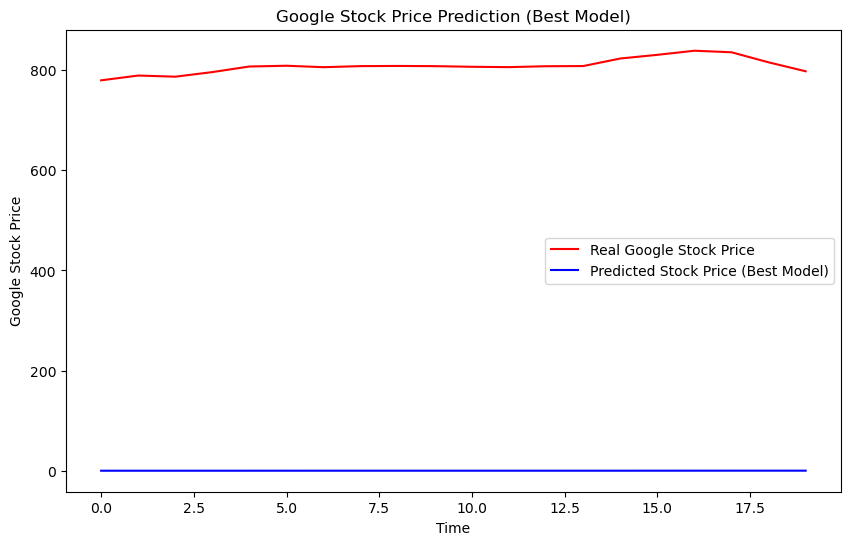

In [36]:
# Hyperparameters for grid search
rnn_types = ["Vanilla RNN", "GRU", "LSTM"]
optimizers = [("Adam", Adam), ("SGD", SGD), ("RMSprop", RMSprop)]
units_list = [50, 100, 150]  
epochs_list = [10, 20]       
batch_size_list = [16, 32]   

# Initialize the scalar
scaler = MinMaxScaler(feature_range=(0, 1))
results = {}

# Flatten X_train and y_train for scaling
X_train_flat = X_train.reshape(-1, 1)
y_train_flat = y_train.reshape(-1, 1)

# Fit scaler on the training data
scaler.fit(X_train_flat)

# Scale the data
X_train_scaled_flat = scaler.transform(X_train_flat)
y_train_scaled = scaler.transform(y_train_flat)
X_test_flat = X_test.reshape(-1, 1)
X_test_scaled_flat = scaler.transform(X_test_flat)

# Reshaping the scaled data back to original shapes for the RNN
X_train_scaled = X_train_scaled_flat.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled = X_test_scaled_flat.reshape(X_test.shape[0], X_test.shape[1], 1)

# Grid search over hyperparameters
param_combinations = list(product(rnn_types, optimizers, units_list, epochs_list, batch_size_list))

for (rnn_type, (optimizer_name, optimizer_class), units, epochs, batch_size) in param_combinations:
    print(f"\nTraining {rnn_type} | Optimizer: {optimizer_name} | Units: {units} | Epochs: {epochs} | Batch Size: {batch_size}")
    
    # Create a fresh optimizer instance for each training run
    optimizer = optimizer_class()
    
    # Build and train the model using scaled data
    model = build_and_train_model(rnn_type, optimizer, units, epochs, batch_size)
    
    # Test the model
    predicted_stock_price_scaled = model.predict(X_test_scaled)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price_scaled)
    
    # Evaluate  the performance
    mse = mean_squared_error(real_stock_price, predicted_stock_price)
    mae = mean_absolute_error(real_stock_price, predicted_stock_price)
    
    # Storing the results
    results[(rnn_type, optimizer_name, units, epochs, batch_size)] = {
        'model': model,
        'mse': mse,
        'mae': mae,
        'predicted_stock_price': predicted_stock_price
    }

# Finding the best model based on Mean Squared Error 
best_model_params = min(results, key=lambda x: results[x]['mse'])
best_model = results[best_model_params]

# Displaying the best model 
print("\nBest Model Parameters:")
print(f"RNN Type: {best_model_params[0]}")
print(f"Optimizer: {best_model_params[1]}")
print(f"Units: {best_model_params[2]}")
print(f"Epochs: {best_model_params[3]}")
print(f"Batch Size: {best_model_params[4]}")
print(f"Mean Squared Error (MSE): {best_model['mse']:.2f}")
print(f"Mean Absolute Error (MAE): {best_model['mae']:.2f}")

# Plot the results of the best model
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(best_model['predicted_stock_price'], color='blue', label=f'Predicted Stock Price (Best Model)')
plt.title(f'Google Stock Price Prediction (Best Model)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()